In [2449]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [2450]:
# load dataset
from google.colab import drive

# drive.mount('/drive')
data = pd.read_csv('/content/risk_of_brain_tumor.csv')
data.head()

,Unnamed: 0,Patient Id,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
0,0,P1,33,1,3,4,2,2,2,2,...,3,4,4,2,3,3,2,2,4,0
1,1,P240,35,1,2,4,2,2,6,2,...,2,4,3,1,4,2,4,2,4,0
2,2,P239,42,1,4,3,2,1,3,2,...,1,2,2,3,1,1,1,1,2,0
3,3,P10,17,1,4,3,8,7,2,7,...,2,3,1,1,1,2,2,6,2,0
4,4,P238,22,0,3,4,3,1,5,1,...,4,2,2,2,3,6,5,1,1,0


In [2451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              363 non-null    int64 
 1   Patient Id              363 non-null    object
 2   Age                     363 non-null    int64 
 3   Gender                  363 non-null    int64 
 4   Genetic Risk            363 non-null    int64 
 5   Occupational Hazards    363 non-null    int64 
 6   Headache                363 non-null    int64 
 7   Seizure Rate            363 non-null    int64 
 8   Convulsion Rate         363 non-null    int64 
 9   Blurred Vision          363 non-null    int64 
 10  Double Vision           363 non-null    int64 
 11  Peripheral Vision Loss  363 non-null    int64 
 12  Loss of Smell           363 non-null    int64 
 13  Balance Disorder        363 non-null    int64 
 14  Nausea                  363 non-null    int64 
 15  Vomiti

In [2452]:
data.describe()

,Unnamed: 0,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,181.000000,33.369146,0.561983,4.212121,4.426997,3.837466,3.931129,4.022039,2.774105,3.217631,...,2.953168,4.264463,3.473829,3.165289,3.504132,3.504132,3.225895,3.325069,3.005510,0.506887
std,104.933312,12.342324,0.496828,1.938749,1.947385,2.037908,2.234386,1.791496,1.556910,1.844663,...,2.068044,2.354384,2.243777,1.762158,2.132842,2.367333,1.694545,1.947971,1.469759,0.500643
min,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,90.500000,25.000000,0.000000,2.500000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,181.000000,33.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,...,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
75%,271.500000,39.000000,1.000000,6.000000,7.000000,5.000000,6.000000,6.000000,4.000000,4.000000,...,5.000000,7.000000,5.000000,4.000000,4.000000,6.000000,5.000000,5.000000,4.000000,1.000000
max,362.000000,73.000000,1.000000,7.000000,8.000000,8.000000,9.000000,7.000000,7.000000,8.000000,...,8.000000,9.000000,9.000000,7.000000,9.000000,8.000000,7.000000,9.000000,7.000000,1.000000


In [2453]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview

,Null counts,Null %,Cardinality
Unnamed: 0,0,0.0,363
Patient Id,0,0.0,251
Age,0,0.0,36
Gender,0,0.0,2
Genetic Risk,0,0.0,7
Occupational Hazards,0,0.0,8
Headache,0,0.0,8
Seizure Rate,0,0.0,8
Convulsion Rate,0,0.0,7
Blurred Vision,0,0.0,7


In [2454]:
data.drop(["Patient Id", "Unnamed: 0", "Genetic Risk", "Occupational Hazards", "Seizure Rate", "Convulsion Rate", "Rate of Memory Lapses", "Syncope Rate"], axis=1, inplace = True)
data.drop_duplicates(inplace=True)


In [2455]:
#Mengelompokkan Data Numerik
nums = ['Age', 'Gender', 
        'Headache', 'Blurred Vision',
        'Double Vision', 'Peripheral Vision Loss',
        'Loss of Smell', 'Balance Disorder',
        'Nausea', 'Vomiting',
        'Drowsiness', 'Personality disorder',
        'Numbness in arms', 'Numbness in legs', 'C-Risk Level']

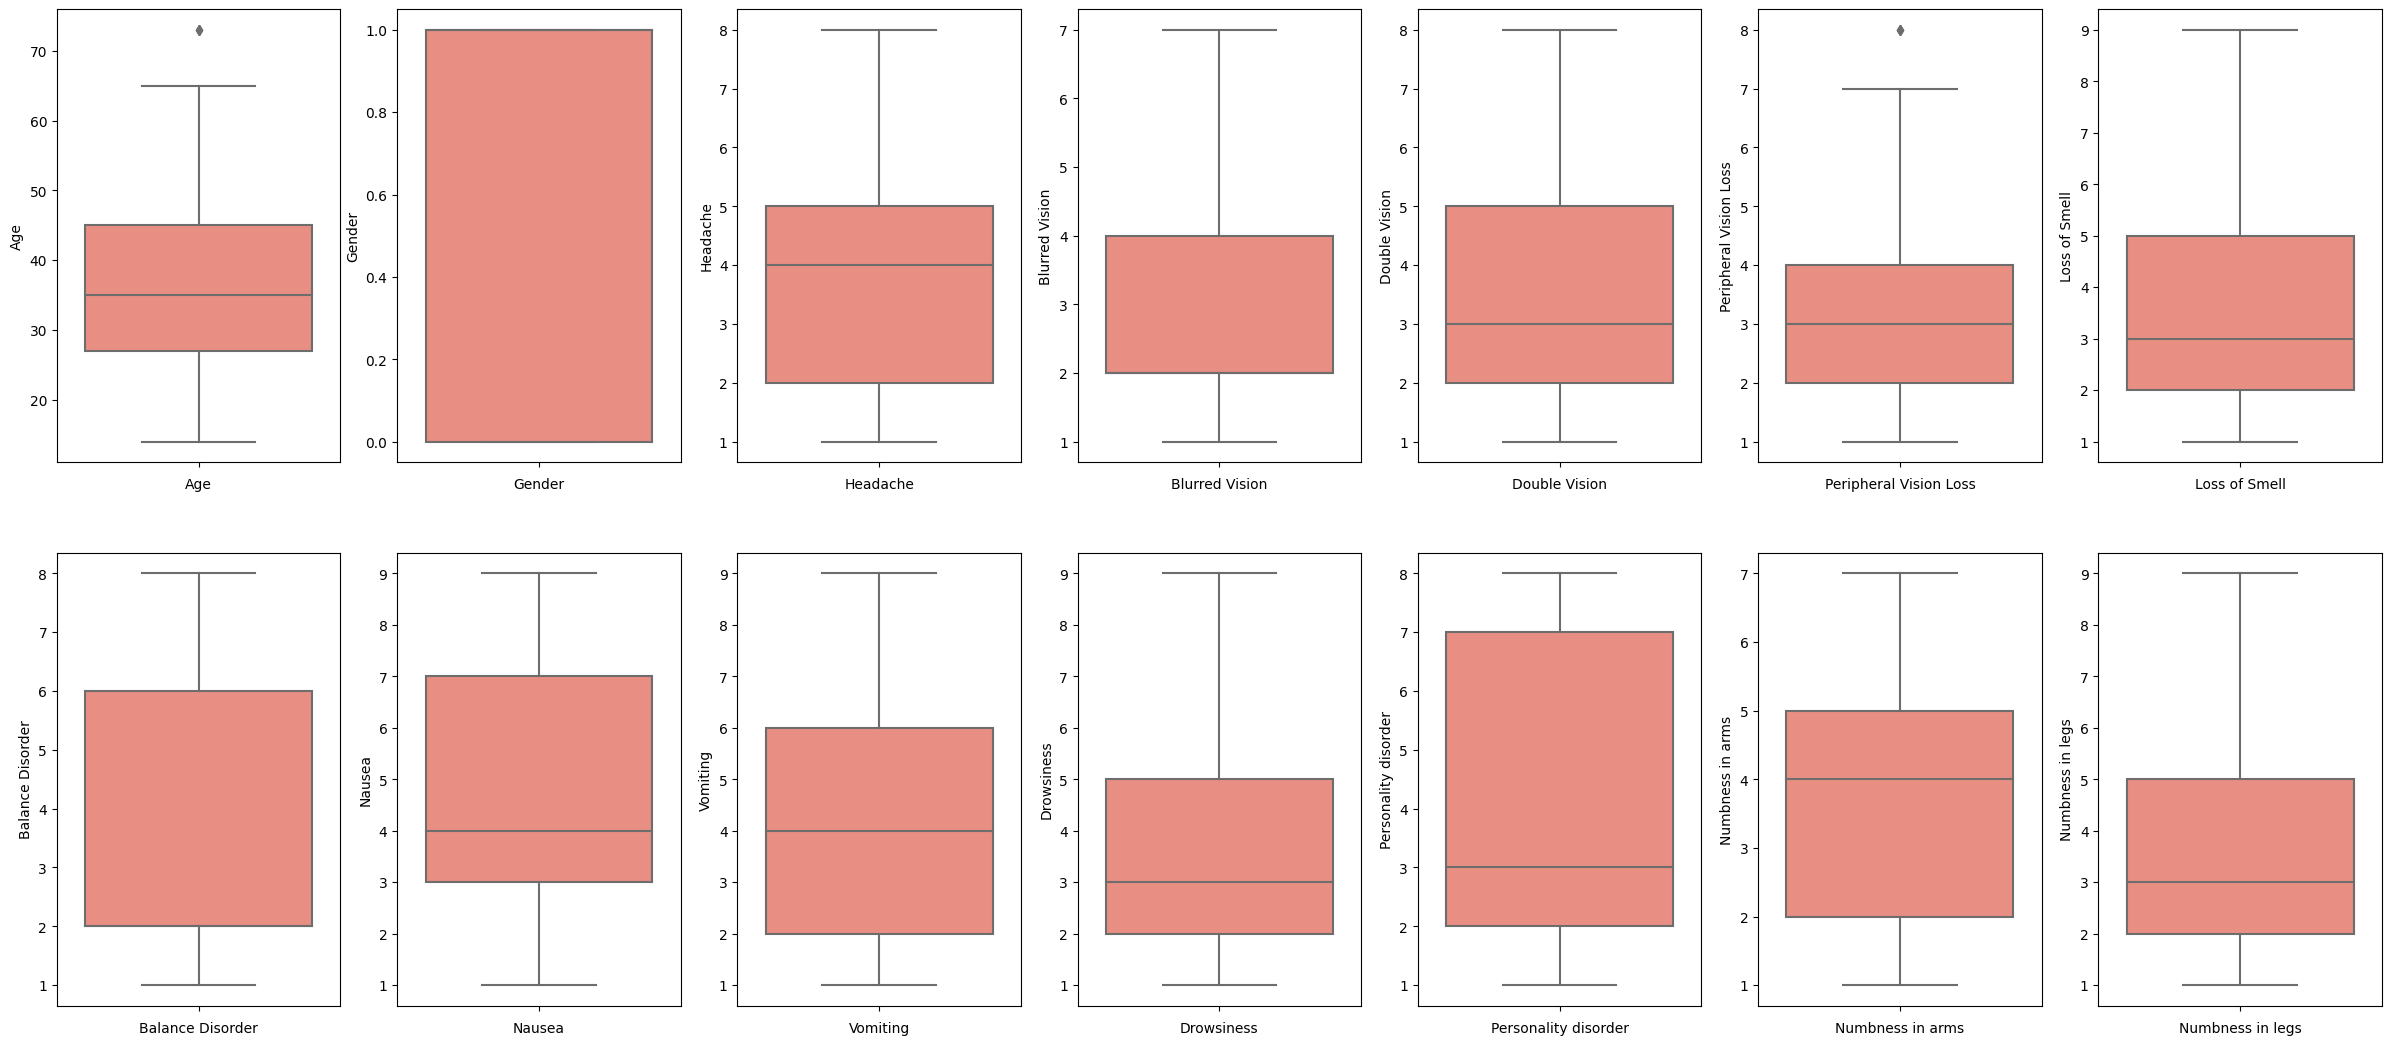

In [2456]:
#Melakukan Analisis Univariat Menggunakan Boxplot untuk mendeteksi adanya outlier
plt.figure(figsize=(30,20))
features = nums[:14]
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=data[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

In [2457]:
q = data["Age"].quantile(0.99)
data[data["Age"] < q]
q_low = data["Age"].quantile(0.01)
q_hi  = data["Age"].quantile(0.99)

data = data[(data["Age"] < q_hi) & (data["Age"] > q_low)]

In [2458]:
q = data["Peripheral Vision Loss"].quantile(0.99)
data[data["Peripheral Vision Loss"] < q]
q_low = data["Peripheral Vision Loss"].quantile(0.01)
q_hi  = data["Peripheral Vision Loss"].quantile(0.99)

data = data[(data["Peripheral Vision Loss"] < q_hi) & (data["Peripheral Vision Loss"] > q_low)]

In [2459]:
data

,Age,Gender,Headache,Blurred Vision,Double Vision,Peripheral Vision Loss,Loss of Smell,Balance Disorder,Nausea,Vomiting,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,C-Risk Level
0,33,1,2,2,2,2,2,3,4,4,3,3,2,2,0
1,35,1,2,2,2,2,2,2,4,3,4,2,4,2,0
2,42,1,2,2,2,2,1,1,2,2,1,1,1,1,0
5,35,1,2,2,2,2,7,2,8,6,8,2,4,7,1
7,17,0,2,2,2,2,2,2,2,2,1,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,27,1,4,2,3,2,2,1,1,1,3,1,2,2,0
359,65,1,5,3,3,4,4,1,3,2,2,1,4,5,1
360,38,0,5,3,4,3,2,1,4,4,6,1,3,2,1
361,19,1,5,2,4,4,6,2,3,1,4,2,2,6,0


In [2460]:
y = data['C-Risk Level']
X = data.drop('C-Risk Level',axis=1)


for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,Age,Gender,Headache,Blurred Vision,Double Vision,Peripheral Vision Loss,Loss of Smell,Balance Disorder,Nausea,Vomiting,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs
0,33,1,1,1,1,1,1,2,3,3,2,2,1,1
1,35,1,1,1,1,1,1,1,3,2,3,1,3,1
2,42,1,1,1,1,1,0,0,1,1,0,0,0,0
5,35,1,1,1,1,1,6,1,7,5,7,1,3,6
7,17,0,1,1,1,1,1,1,1,1,0,2,1,2


In [2461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [2462]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [2463]:
X.shape

(201, 14)

In [2464]:
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_val['Age'] = scaler.transform(X_val[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

print(scaler.mean_)
print(scaler.var_)
X_train

[33.92771084]
[118.42850922]


,Age,Gender,Headache,Blurred Vision,Double Vision,Peripheral Vision Loss,Loss of Smell,Balance Disorder,Nausea,Vomiting,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs
0,0.466097,1,3,3,3,2,1,5,5,4,4,5,1,1
1,1.660676,1,4,2,3,4,4,0,2,0,1,0,5,3
2,1.660676,0,3,2,3,1,1,2,3,3,3,2,3,1
3,0.098533,0,1,1,1,1,6,1,7,6,7,1,2,8
4,0.925550,1,6,4,6,4,1,6,6,6,4,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.098533,1,1,1,1,1,1,1,3,2,3,1,3,1
162,-0.085248,1,1,1,1,1,1,0,3,3,2,2,1,1
163,-1.371719,1,4,2,3,2,3,1,2,2,3,1,1,5
164,-0.636593,0,3,1,3,3,1,0,0,0,2,0,1,1


In [2465]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation='relu', input_shape=[14]))
# model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [2466]:
model.build()

In [2467]:
model.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 5)                 75        
                                                                 
 dense_153 (Dense)           (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [2468]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=150, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/150
11/11 [==============================] - 1s 17ms/step - loss: 1.0938 - accuracy: 0.3795 - val_loss: 0.8836 - val_accuracy: 0.5250
Epoch 2/150
11/11 [==============================] - 0s 6ms/step - loss: 0.9844 - accuracy: 0.4036 - val_loss: 0.7645 - val_accuracy: 0.5750
Epoch 3/150
11/11 [==============================] - 0s 5ms/step - loss: 0.8918 - accuracy: 0.4337 - val_loss: 0.7017 - val_accuracy: 0.5750
Epoch 4/150
11/11 [==============================] - 0s 6ms/step - loss: 0.8271 - accuracy: 0.4880 - val_loss: 0.6664 - val_accuracy: 0.6250
Epoch 5/150
11/11 [==============================] - 0s 6ms/step - loss: 0.7810 - accuracy: 0.5060 - val_loss: 0.6464 - val_accuracy: 0.6500
Epoch 6/150
11/11 [==============================] - 0s 4ms/step - loss: 0.7458 - accuracy: 0.5060 - val_loss: 0.6332 - val_accuracy: 0.6500
Epoch 7/150
11/11 [==============================] - 0s 4ms/step - loss: 0.7188 - accuracy: 0.5060 - val_loss: 0.6322 - val_accuracy: 0.6750
Epoch 8/150


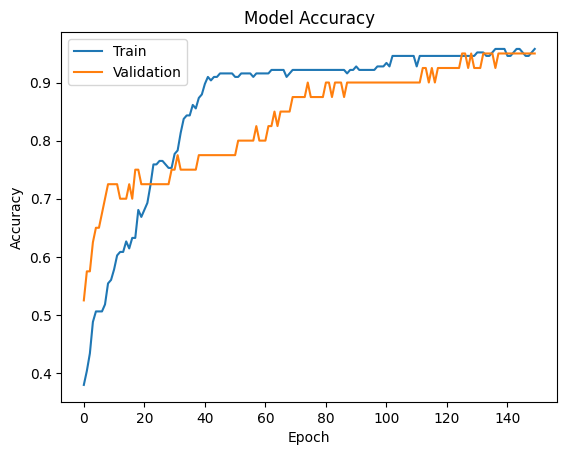

In [2469]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

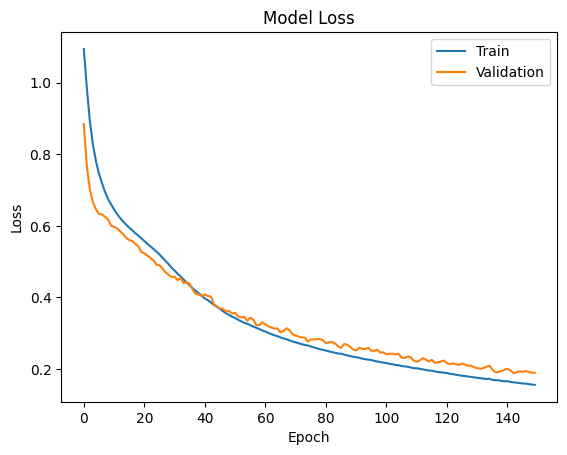

In [2470]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [2471]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9756
Test loss: 0.12487685680389404
Test accuracy: 0.9756097793579102


2/2 [==============================] - 0s 4ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

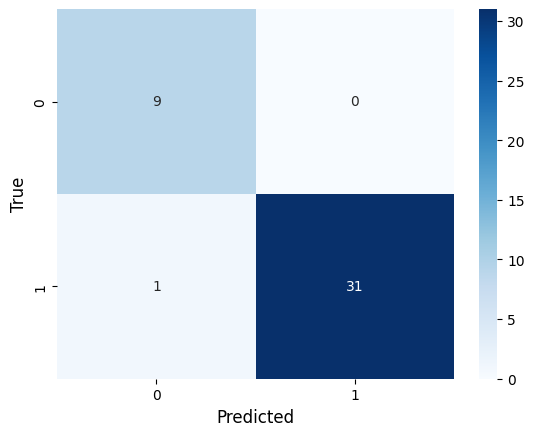

In [2472]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [2473]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.98        32

    accuracy                           0.98        41
   macro avg       0.95      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



In [2474]:
print(model.trainable_variables) 

[<tf.Variable 'dense_152/kernel:0' shape=(14, 5) dtype=float32, numpy=
array([[-0.19631876,  0.78826374, -0.21554357, -1.4023597 ,  0.44255298],
       [ 0.43440178, -0.7623766 ,  0.16973093,  0.7363429 , -0.39239565],
       [-0.55624133, -0.24782012, -0.39458537,  0.38585678,  0.09602106],
       [-0.13019739,  0.36137214,  0.65792215,  0.26465657,  0.38388073],
       [-0.5053886 , -0.24973038,  0.04969239, -0.45258668,  0.02370054],
       [-0.26028174,  0.28354436,  0.02888464,  0.40332657,  0.23693812],
       [ 0.37177354,  0.63624483,  0.13060345,  0.06547201, -0.05176314],
       [-0.18830243,  0.25905555, -0.3011523 ,  0.25003874, -0.20116428],
       [-0.46638548, -0.28055206,  0.24402504, -0.7387877 , -0.08027119],
       [ 0.22364445,  0.50957024, -0.04597782,  0.4088529 ,  0.11571223],
       [-0.38467985,  0.10732184, -0.5734983 ,  0.62006456, -0.0045445 ],
       [-0.53272426, -0.1601736 ,  0.5998362 , -0.10793624,  0.5298372 ],
       [ 0.35392585,  0.5415351 , -0.5474

In [2475]:
# !mkdir -p saved_model
# model.save('saved_model/my_model')

In [2476]:
# model.save('my_model.h5')

In [2477]:
# from google.colab import files

# files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
# files.download('saved_model/my_model/variables/variables.index')
# files.download('saved_model/my_model/fingerprint.pb')
# files.download('saved_model/my_model/keras_metadata.pb')
# files.download('saved_model/my_model/saved_model.pb')

In [2478]:
# files.download('my_model.h5')

In [2479]:
# new_model = tf.keras.models.load_model('saved_model/my_model')

In [2480]:
# # loss, acc = new_model.evaluate(X_test, y_test)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))